# ML Домашняя работа "Оценка точности модели, переобучение, регуляризация"

Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

Потроить график Precision - Recall на этих же данных.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [4]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

In [5]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [6]:
Y = data['affair']

In [7]:
model = LogisticRegression()

In [10]:
#Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [9]:
#Обучаем модель

model.fit(X_train, Y_train)

LogisticRegression()

In [12]:
#Получаем прогнозные значения модели (переменная predictions)

predictions = model.predict_proba(X_test)

In [13]:
model.score(X_test, Y_test)

0.7319371727748691

# Посчитаем tpr и fpr штатными средствами и построим график

Recall (полнота), так же sensitivity и TPR (true positive rate), показывает долю найденных объектов класса к общему числу объектов класса. Иначе говоря то, насколько хорошо наш классификатор находит объекты из класса.

Fall-out, так же FPR (false positive rate), показывает долю неверных срабатываний классификатора к общему числу объектов за пределами класса. Иначе говоря то, насколько часто классификатор ошибается при отнесении того или иного объекта к классу.

### Найдем все значения tpr и fpr изменяя значение поорга от 0 до 1

In [138]:
predictions = model.predict_proba( X_test )
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative


tpr_all = []
fpr_all = []
presion_all = []
recall_all = []

thres = 0
while thres < 1:
    predictions = model.predict_proba( X_test )
    for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
        if predicted_prob >= thres:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    tpr_0 = tp / (tp + fn)
    fpr_0 = fp / (fp + tn)
    presion = tp / (tp+fp)
    recall = tp/ (tp+fn)
    tpr_all.append(tpr_0)
    fpr_all.append(fpr_0)
    presion_all.append(presion)
    recall_all.append(recall)
    thres = thres + 0.01

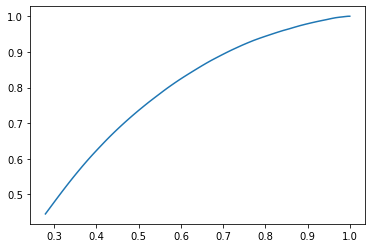

In [123]:
plt.plot( fpr_all, tpr_all)

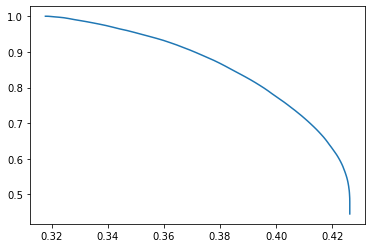

In [139]:
plt.plot( presion_all, recall_all)

# Построим график ROC

In [25]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [127]:
# получаем значения false и true positive rate для различных значений порога
fpr_roc, tpr_roc, thres = roc_curve( Y_test, predictions[:, 1] )

In [130]:
# получаем значения false и true positive rate для различных значений порога
fpr_roc, tpr_roc, thres = roc_curve( Y_test, predictions[:, 1] )

In [131]:
for line in zip( fpr_roc, tpr_roc, thres ):
    print( line )

(0.0, 0.0, 1.9292091240417193)
(0.0, 0.0016474464579901153, 0.9292091240417194)
(0.0, 0.008237232289950576, 0.8999886264319402)
(0.0007674597083653108, 0.008237232289950576, 0.8977304662491573)
(0.0007674597083653108, 0.019769357495881382, 0.8650840115908353)
(0.0030698388334612432, 0.019769357495881382, 0.8547129982578022)
(0.0030698388334612432, 0.023064250411861616, 0.8544826944244506)
(0.003837298541826554, 0.023064250411861616, 0.852192680753538)
(0.003837298541826554, 0.03130148270181219, 0.8338303582674914)
(0.004604758250191865, 0.03130148270181219, 0.8336073268224053)
(0.004604758250191865, 0.03789126853377265, 0.8248957645640771)
(0.005372217958557176, 0.03789126853377265, 0.8231501798163071)
(0.005372217958557176, 0.04118616144975288, 0.8191949336705289)
(0.0061396776669224865, 0.04118616144975288, 0.8186308235365252)
(0.0061396776669224865, 0.04942339373970346, 0.8087952633346721)
(0.006907137375287797, 0.04942339373970346, 0.8081343519235271)
(0.006907137375287797, 0.05766

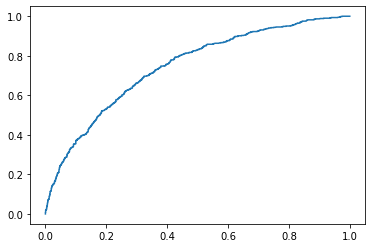

In [132]:
plt.plot( fpr_roc, tpr_roc )

Графики получились похожими

# Построим график AUC

In [125]:
from sklearn.metrics import auc

In [134]:
auc( fpr, tpr)

0.7451629176618145

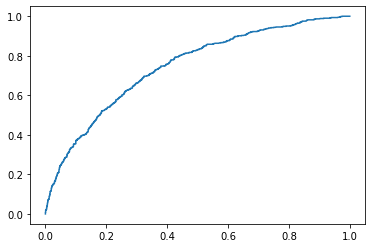

In [135]:
plt.plot( fpr, tpr )